In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA of Datasets

#### Exploring the Calendar Dataset

In [3]:
#Calendar Data:

calendar = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/calendar-9-18-22.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,$225.00,$225.00,4.0,365.0
1,29967,2022-09-19,f,$225.00,$225.00,4.0,365.0
2,29967,2022-09-20,f,$225.00,$225.00,4.0,365.0
3,29967,2022-09-21,f,$225.00,$225.00,4.0,365.0
4,29967,2022-09-22,f,$225.00,$225.00,4.0,365.0


In [4]:
calendar['listing_id'].nunique()

14186

There are a total of 14,186 individual property listings

In [5]:
calendar.shape

(5173672, 7)

There are over 5 million rows of data and 7 features in this dataset

In [6]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

#### Converting the data types into the correct format

In [7]:
#converting price & adjusted price to integer

calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])

calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_93376/2502108965.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_93376/2502108965.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')


In [9]:
#Converting the date column into the correct data formart

calendar['date'] = pd.to_datetime(calendar['date'])

In [8]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,225.0,4.0,365.0
3,29967,2022-09-21,f,225.0,225.0,4.0,365.0
4,29967,2022-09-22,f,225.0,225.0,4.0,365.0


In [9]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,5.173672e+06,5.170977e+06,5.170977e+06,5.167851e+06,5.167851e+06
mean,1.598379e+17,3.963504e+02,3.947934e+02,7.522396e+00,3.040892e+05
std,2.767907e+17,1.185625e+03,1.183286e+03,2.055726e+01,2.552146e+07
min,2.996700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.501354e+07,1.250000e+02,1.250000e+02,2.000000e+00,3.650000e+02
50%,4.540952e+07,2.110000e+02,2.110000e+02,3.000000e+00,1.125000e+03
75%,5.223218e+17,3.990000e+02,3.990000e+02,5.000000e+00,1.125000e+03
max,7.181068e+17,1.000000e+05,1.000000e+05,9.990000e+02,2.147484e+09


Based on the descriptive statistics, price_usd and adjusted_price_usd are the same so we can drop on of the columns

In [10]:
del calendar['adjusted_price']

In [11]:
calendar.head(3)

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,4.0,365.0


In [12]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price             2695
minimum_nights    5821
maximum_nights    5821
dtype: int64

In [14]:
#drop the null price values

calendar.dropna()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,225.0,4.0,365.0
1,29967,2022-09-19,f,225.0,4.0,365.0
2,29967,2022-09-20,f,225.0,4.0,365.0
3,29967,2022-09-21,f,225.0,4.0,365.0
4,29967,2022-09-22,f,225.0,4.0,365.0
...,...,...,...,...,...,...
5173667,103841,2023-09-13,f,103.0,2.0,31.0
5173668,103841,2023-09-14,f,103.0,2.0,31.0
5173669,103841,2023-09-15,f,103.0,2.0,31.0
5173670,103841,2023-09-16,f,103.0,2.0,31.0


Around 8,516 rows of data loss with removal of null values

Looking at the average daily pricing:

In [34]:
#looking at average price per day

average_price = calendar.groupby('date')['price'].mean()

average_price.head()

date
2022-09-18    349.354344
2022-09-19    326.569281
2022-09-20    326.932237
2022-09-21    329.501376
2022-09-22    338.522690
Name: price, dtype: float64

In [35]:
average_price.shape

(369,)

There are 369 days of data

<AxesSubplot: title={'center': 'Average Daily Pricing'}, xlabel='Date', ylabel='Price (USD)'>

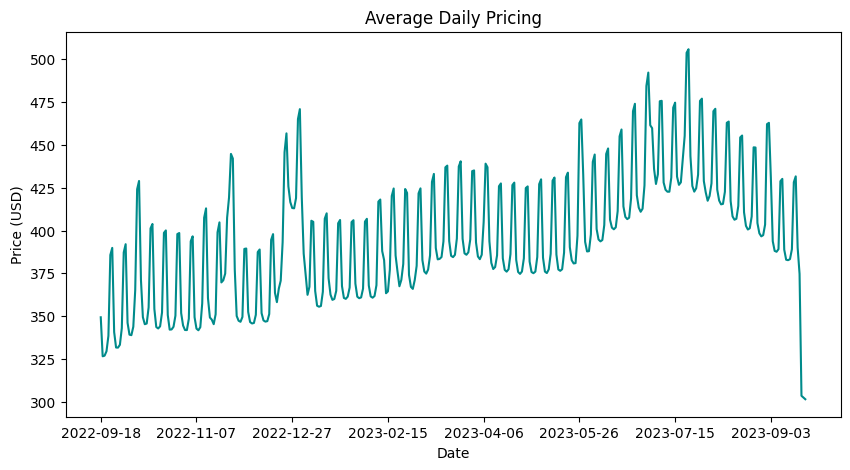

In [54]:
#Time Series plot of the average daily pricing
average_price.plot(figsize=(10,5), title='Average Daily Pricing', xlabel="Date", ylabel="Price (USD)", color = "darkcyan")

There seems to be a general increase trend going into holiday season in November and December. This makes sense as people tend to travel and vacation at the end of the year during the holidays. There's also an increasing trend through the summer period with pricing peaking some time between July and and August. These are most likely the most popular month for travel in San Diego. There also seems to be some cycles based on this figure. Pricing seems to go up and down pretty frequently. This probably is due to weekday's being cheaper pricing and weekends having higher pricing. 

Looking at the "available" feature:

In [37]:
calendar.available.unique()

array(['f', 't'], dtype=object)

'f' must mean false indicating that the listing isn't available. 't' must mean true indicating that the listing is available. This categorical feature can be encoded.

In [41]:
available_values = calendar.available.value_counts()
available_values

t    2618177
f    2555495
Name: available, dtype: int64

<AxesSubplot: title={'center': 'Count of Listing Availability Status'}, xlabel='Count', ylabel='Available Status'>

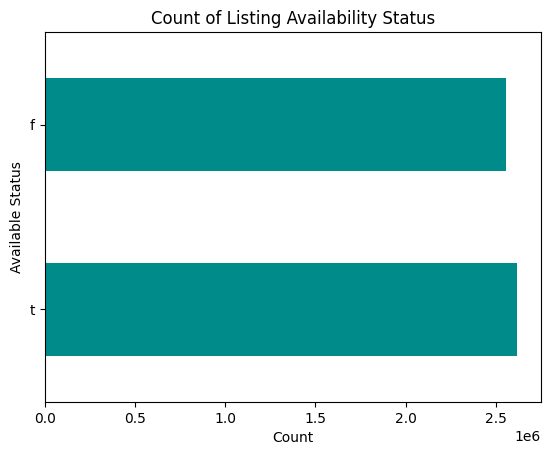

In [55]:
available_values.plot(kind='barh', title='Count of Listing Availability Status', xlabel="Count", ylabel="Available Status", color='darkcyan')

Almost even distribution for this feature

#### Exploring the Reviews dataset

In [56]:
reviews = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/reviews-9-18-22.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...


Not sure if this dataset will be necessary

#### Exploring Weather Dataset

In [57]:
weather = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/SD_Weather_Data.csv')

weather.head()

,Date,Precip,Max Temp,Min Temp
0,20220918,0,76.0,59.0
1,20220919,0,78.0,57.0
2,20220920,0,80.0,58.0
3,20220921,0,79.0,62.0
4,20220922,0,81.0,56.0


In [58]:
weather.shape

(396, 4)

There are 396 dates within the dataset

In [59]:
weather.dtypes

Date         object
Precip       object
Max Temp    float64
Min Temp    float64
dtype: object

In [60]:
weather.isnull().sum()

Date        25
Precip      26
Max Temp    27
Min Temp    27
dtype: int64

There are several missing values across all features. These will have to be imputed

Date needs to be converted into proper format

In [61]:
#Converting the date column into the correct data formart


def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m%d')
    except ValueError:
        return pd.NaT
weather['Date'] = weather['Date'].apply(convert_date)

In [62]:
weather.head()

,Date,Precip,Max Temp,Min Temp
0,2022-09-18,0,76.0,59.0
1,2022-09-19,0,78.0,57.0
2,2022-09-20,0,80.0,58.0
3,2022-09-21,0,79.0,62.0
4,2022-09-22,0,81.0,56.0


In [63]:
weather.describe()

,Max Temp,Min Temp
count,369.000000,369.000000
mean,69.772358,52.582656
std,7.439042,8.660839
min,54.000000,35.000000
25%,64.000000,44.000000
50%,70.000000,54.000000
75%,76.000000,61.000000
max,96.000000,65.000000


Creating average daily temperature column:

In [65]:
weather['Average Temp'] = weather[['Max Temp', 'Min Temp']].mean(axis=1)

weather.head()

,Date,Precip,Max Temp,Min Temp,Average Temp
0,2022-09-18,0,76.0,59.0,67.5
1,2022-09-19,0,78.0,57.0,67.5
2,2022-09-20,0,80.0,58.0,69.0
3,2022-09-21,0,79.0,62.0,70.5
4,2022-09-22,0,81.0,56.0,68.5


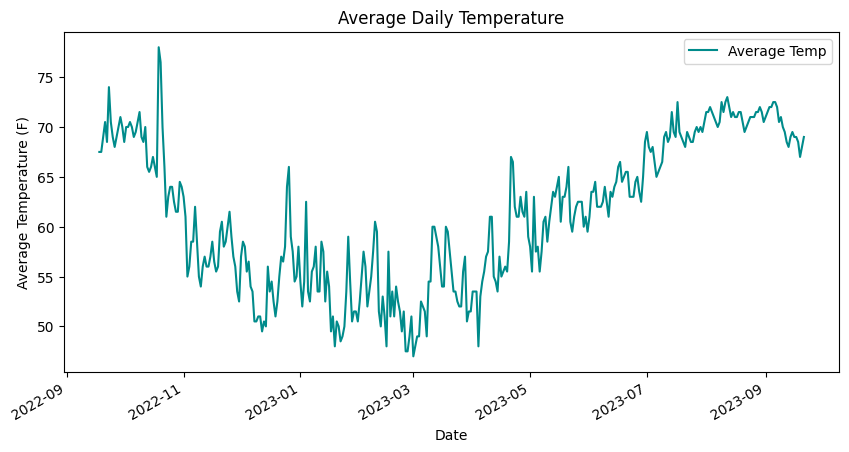

In [68]:
average_temp = weather.plot(x="Date", y="Average Temp", figsize=(10,5), title='Average Daily Temperature', xlabel="Date", ylabel="Average Temperature (F)", color = "darkcyan")

#### Exploring Listings Dataset

In [69]:
listings = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/listings-9-18-22.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.91,4.80,4.76,NaN,f,5,5,0,0,0.59
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.79,4.61,4.40,NaN,f,3,0,3,0,1.02
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.81,4.89,4.69,NaN,t,2,2,0,0,1.20
3,126344,https://www.airbnb.com/rooms/126344,20220918143850,2022-09-18,city scrape,"Tourmaline House - Steps to Beach, Pet-Friendly",Our stylish beach house in North Pacific Beach...,The house sits just 2 blocks off the beach at ...,https://a0.muscache.com/pictures/55dd5953-67a5...,546519,...,4.81,4.78,4.65,NaN,t,2,2,0,0,1.38
4,54001,https://www.airbnb.com/rooms/54001,20220918143850,2022-09-18,city scrape,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...","Quiet, off the beaten path, tranquility abound...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,...,4.98,4.97,4.89,NaN,f,2,1,1,0,2.08


In [70]:
listings.shape

(14188, 75)

In [71]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.418800e+04,1.418800e+04,1.418800e+04,14174.000000,14174.000000,0.0,14188.000000,14188.000000,14188.000000,0.0,...,12502.000000,12500.000000,12502.000000,12500.000000,12500.000000,14188.000000,14188.00000,14188.000000,14188.000000,12523.000000
mean,1.598576e+17,2.022092e+13,1.380560e+08,56.730634,91.212220,NaN,32.763520,-117.173845,4.850085,NaN,...,4.756353,4.859007,4.844059,4.831859,4.690884,17.266422,16.52333,0.691711,0.046307,2.062491
std,2.768093e+17,0.000000e+00,1.418414e+08,214.526050,379.486691,NaN,0.095893,0.074868,3.134675,NaN,...,0.380371,0.325133,0.342444,0.304398,0.389596,35.920780,35.91296,2.055917,0.651223,1.862493
min,2.996700e+04,2.022092e+13,9.080000e+02,1.000000,1.000000,NaN,32.519860,-117.282580,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2.501449e+07,2.022092e+13,2.392536e+07,1.000000,2.000000,NaN,32.719040,-117.248801,2.000000,NaN,...,4.690000,4.860000,4.830000,4.800000,4.600000,1.000000,1.00000,0.000000,0.000000,0.570000
50%,4.540953e+07,2.022092e+13,8.279021e+07,4.000000,5.000000,NaN,32.756810,-117.166926,4.000000,NaN,...,4.860000,4.950000,4.950000,4.920000,4.780000,3.000000,2.00000,0.000000,0.000000,1.530000
75%,5.228793e+17,2.022092e+13,2.195369e+08,19.000000,26.000000,NaN,32.798945,-117.129263,6.000000,NaN,...,4.980000,5.000000,5.000000,5.000000,4.900000,13.000000,12.00000,0.000000,0.000000,3.100000
max,7.181068e+17,2.022092e+13,4.793766e+08,2641.000000,7013.000000,NaN,33.125690,-116.896560,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,213.000000,213.00000,18.000000,14.000000,14.110000


In [72]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [78]:
# looking at review scores distributions

listings_reviews = listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

listings_reviews.head(3)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.76,4.75,4.55,4.91,4.91,4.80,4.76
1,4.33,4.35,4.22,4.72,4.79,4.61,4.40
2,4.75,4.79,4.55,4.88,4.81,4.89,4.69


array([[<AxesSubplot: title={'center': 'review_scores_rating'}>,
        <AxesSubplot: title={'center': 'review_scores_accuracy'}>,
        <AxesSubplot: title={'center': 'review_scores_cleanliness'}>],
       [<AxesSubplot: title={'center': 'review_scores_checkin'}>,
        <AxesSubplot: title={'center': 'review_scores_communication'}>,
        <AxesSubplot: title={'center': 'review_scores_location'}>],
       [<AxesSubplot: title={'center': 'review_scores_value'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

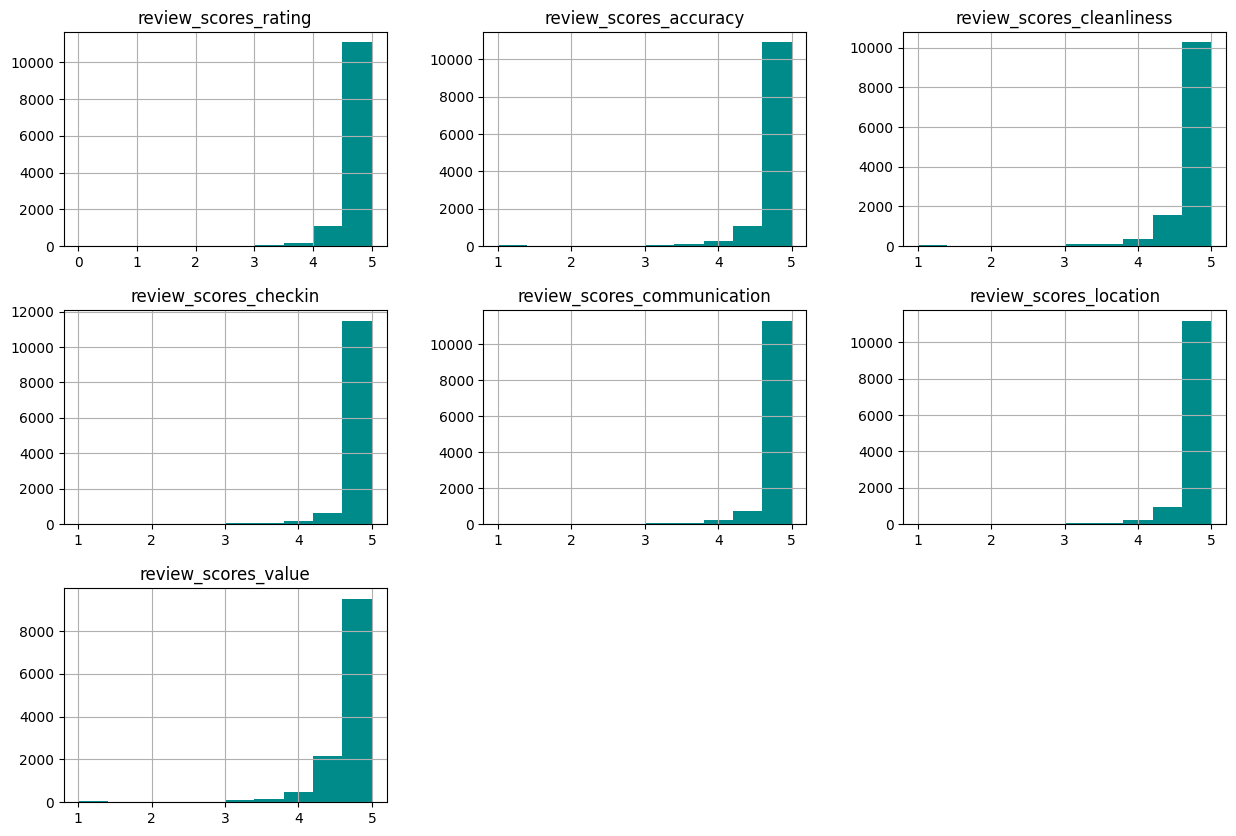

In [91]:
#Histograms of reviews scores

listings_reviews.hist(color = "darkcyan", figsize=(15,10))


Looking at property type feature:

In [92]:
property_type_values = listings.property_type.value_counts()
property_type_values

Entire home                  3806
Entire rental unit           2610
Entire condo                 2304
Private room in home         1128
Entire guesthouse             677
                             ... 
Private room in treehouse       1
Shared room in tent             1
Treehouse                       1
Room in hostel                  1
Room in resort                  1
Name: property_type, Length: 78, dtype: int64

There are 78 total different property types. Perhaps it would be good to narrow down or remove property types that have few counts

<AxesSubplot: title={'center': 'Top 10 Property Types'}, xlabel='Count', ylabel='Property Types'>

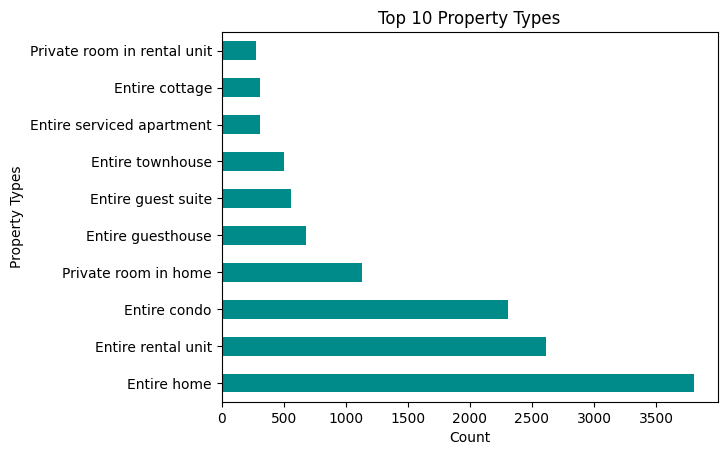

In [98]:
property_type_values = property_type_values.sort_values(ascending=False).head(10)
property_type_values.plot(kind='barh', title='Top 10 Property Types', xlabel="Count", ylabel="Property Types", color='darkcyan')

Top property types include "Entire home", "Entire rental unit", "Entire condo"

In [99]:
listings_nulls

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1665
Length: 75, dtype: int64

Dataset has lots of features and may be better to consolidate before diving into EDA

In [100]:
listings.host_neighbourhood.head()

0    Pacific Beach
1      Loma Portal
2    Pacific Beach
3    Pacific Beach
4         La Jolla
Name: host_neighbourhood, dtype: object

In [101]:
listings.host_neighbourhood.nunique()

371

There are 371 total neighborhoods. These could be encoded during preparation process

In [103]:
neighborhood_values = listings.host_neighbourhood.value_counts()
neighborhood_values

Mission Beach               1138
Pacific Beach               1115
La Jolla                     814
North Park                   573
East Village                 522
                            ... 
Hillsboro West End             1
Mid-Wilshire                   1
Anatolia Village               1
Torrey Highlands Village       1
Yesler Terrace                 1
Name: host_neighbourhood, Length: 371, dtype: int64

<AxesSubplot: title={'center': 'Top 10 Neighborhoods With Most Listings'}, xlabel='Count', ylabel='Neighborhoods'>

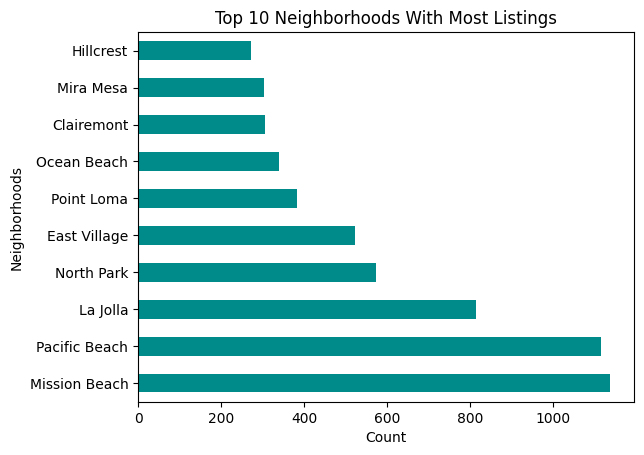

In [104]:
# Top 10 Neighborhoods

neighborhood_values = neighborhood_values.sort_values(ascending=False).head(10)
neighborhood_values.plot(kind='barh', title='Top 10 Neighborhoods With Most Listings', xlabel="Count", ylabel="Neighborhoods", color='darkcyan')

Top neighborhoods with most listings include Mission Beach, Pacific Beach, and La Jolla

In [102]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1665
Length: 75, dtype: int64

There are a lot of features. These need to be trimmed down significantly. Possible methods include dropping rows that have too many null values, trying different model for feature selection, correlation matrix, etc.

# Combining Datasets

In [76]:
final_df = pd.concat([calendar, listings], axis = 1, join = 'outer')

In [44]:
final_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,id,listing_url,scrape_id,last_scraped,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,2022-09-18,f,225.0,4.0,365.0,29967.0,https://www.airbnb.com/rooms/29967,2.022092e+13,2022-09-18,...,4.91,4.91,4.80,4.76,f,5.0,5.0,0.0,0.0,0.59
1,29967,2022-09-19,f,225.0,4.0,365.0,38245.0,https://www.airbnb.com/rooms/38245,2.022092e+13,2022-09-18,...,4.72,4.79,4.61,4.40,f,3.0,0.0,3.0,0.0,1.02
2,29967,2022-09-20,f,225.0,4.0,365.0,108349.0,https://www.airbnb.com/rooms/108349,2.022092e+13,2022-09-19,...,4.88,4.81,4.89,4.69,t,2.0,2.0,0.0,0.0,1.20
3,29967,2022-09-21,f,225.0,4.0,365.0,126344.0,https://www.airbnb.com/rooms/126344,2.022092e+13,2022-09-18,...,4.88,4.81,4.78,4.65,t,2.0,2.0,0.0,0.0,1.38
4,29967,2022-09-22,f,225.0,4.0,365.0,54001.0,https://www.airbnb.com/rooms/54001,2.022092e+13,2022-09-18,...,4.97,4.98,4.97,4.89,f,2.0,1.0,1.0,0.0,2.08


In [47]:
final_df.tail()

,listing_id,date,available,price,minimum_nights,maximum_nights,id,listing_url,scrape_id,last_scraped,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5173667,103841,2023-09-13,f,103.0,2.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5173668,103841,2023-09-14,f,103.0,2.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5173669,103841,2023-09-15,f,103.0,2.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5173670,103841,2023-09-16,f,103.0,2.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5173671,103841,2023-09-17,f,103.0,2.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
final_df.shape

(5173672, 77)

#### Determining Feature Importance